## Reading the data

#### Data can be treated as python dictionary objects. A simple script to read any of the above the data is as follows

In [ ]:
def parse(path):
  g = gzip.open(path, 'r')
  for l in g:
    yield json.loads(l)

# Pandas dataframe

This code reads the data into a pandas data frame

In [ ]:
import pandas as pd
import gzip
import json

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('Musical_Instruments_5.json.gz')

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer

In [ ]:
df

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 30, 2016",A3FO5AKVTFRCRJ,0739079891,francisco,It's good for beginners,Five Stars,1477785600,NaN,NaN,NaN
1,5.0,True,"06 30, 2016",A3UCGC1DHFMBCE,0739079891,Eb Jack Murray,I recommend this starter Ukulele kit. I has e...,Five Stars,1467244800,NaN,NaN,NaN
2,5.0,True,"05 9, 2016",A2S9SLRYLPGYZB,0739079891,Clara LaMarr,G'daughter received this for Christmas present...,Learning new songs to play regularly,1462752000,NaN,NaN,NaN
3,4.0,True,"04 10, 2016",A15RTJWPG8OKOE,0739079891,Eagle80,"According to my order history, I bought this t...",A bargain-bin good-enough ukulele that's held ...,1460246400,NaN,NaN,NaN
4,1.0,True,"02 6, 2016",A12ET1WO3OAVU7,0739079891,Amazon Customer,Please pay attention better than I did to the ...,Poor Quality product.,1454716800,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
231387,5.0,True,"03 29, 2018",A2GLR2Q3M1PC7P,B01HIDOPP2,nic field,It's pretty great.,Five Stars,1522281600,NaN,NaN,NaN
231388,5.0,True,"11 18, 2017",A3S1LSTRW57BP9,B01HIDOPP2,2gene,Good inexpensive wiring harness. It will do th...,Five Stars,1510963200,NaN,NaN,NaN
231389,4.0,True,"06 5, 2017",A2BNWRRADDBSVO,B01HIDOPP2,Tim,Easily installed and worked as expected.,Four Stars,1496620800,NaN,NaN,NaN
231390,1.0,True,"05 27, 2017",A1KRL5ZRON6DPT,B01HIDOPP2,Jude the Obscure,The description stated they were full size pot...,Not as described.,1495843200,NaN,NaN,NaN


In [ ]:
# Data Exploration
print("Data shape:", df.shape)
print("Columns:", df.columns)



Data shape: (231392, 12)
Columns: Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'style', 'image'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231392 entries, 0 to 231391
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         231392 non-null  float64
 1   verified        231392 non-null  bool   
 2   reviewTime      231392 non-null  object 
 3   reviewerID      231392 non-null  object 
 4   asin            231392 non-null  object 
 5   reviewerName    231367 non-null  object 
 6   reviewText      231344 non-null  object 
 7   summary         231341 non-null  object 
 8   unixReviewTime  231392 non-null  int64  
 9   vote            34777 non-null   object 
 10  style           121310 non-null  object 
 11  image           3889 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 21.4+ MB


In [ ]:
df.isna().sum()

overall                0
verified               0
reviewTime             0
reviewerID             0
asin                   0
reviewerName          25
reviewText            48
summary               51
unixReviewTime         0
vote              196615
style             110082
image             227503
dtype: int64

In [ ]:
df= df.dropna(subset=['reviewText'])

In [ ]:
df

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 30, 2016",A3FO5AKVTFRCRJ,0739079891,francisco,It's good for beginners,Five Stars,1477785600,NaN,NaN,NaN
1,5.0,True,"06 30, 2016",A3UCGC1DHFMBCE,0739079891,Eb Jack Murray,I recommend this starter Ukulele kit. I has e...,Five Stars,1467244800,NaN,NaN,NaN
2,5.0,True,"05 9, 2016",A2S9SLRYLPGYZB,0739079891,Clara LaMarr,G'daughter received this for Christmas present...,Learning new songs to play regularly,1462752000,NaN,NaN,NaN
3,4.0,True,"04 10, 2016",A15RTJWPG8OKOE,0739079891,Eagle80,"According to my order history, I bought this t...",A bargain-bin good-enough ukulele that's held ...,1460246400,NaN,NaN,NaN
4,1.0,True,"02 6, 2016",A12ET1WO3OAVU7,0739079891,Amazon Customer,Please pay attention better than I did to the ...,Poor Quality product.,1454716800,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
231387,5.0,True,"03 29, 2018",A2GLR2Q3M1PC7P,B01HIDOPP2,nic field,It's pretty great.,Five Stars,1522281600,NaN,NaN,NaN
231388,5.0,True,"11 18, 2017",A3S1LSTRW57BP9,B01HIDOPP2,2gene,Good inexpensive wiring harness. It will do th...,Five Stars,1510963200,NaN,NaN,NaN
231389,4.0,True,"06 5, 2017",A2BNWRRADDBSVO,B01HIDOPP2,Tim,Easily installed and worked as expected.,Four Stars,1496620800,NaN,NaN,NaN
231390,1.0,True,"05 27, 2017",A1KRL5ZRON6DPT,B01HIDOPP2,Jude the Obscure,The description stated they were full size pot...,Not as described.,1495843200,NaN,NaN,NaN


In [ ]:
df.value_counts('verified')

verified
True     207265
False     24079
dtype: int64

In [ ]:
df = df[df['verified'] == True]

In [ ]:
df

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 30, 2016",A3FO5AKVTFRCRJ,0739079891,francisco,It's good for beginners,Five Stars,1477785600,NaN,NaN,NaN
1,5.0,True,"06 30, 2016",A3UCGC1DHFMBCE,0739079891,Eb Jack Murray,I recommend this starter Ukulele kit. I has e...,Five Stars,1467244800,NaN,NaN,NaN
2,5.0,True,"05 9, 2016",A2S9SLRYLPGYZB,0739079891,Clara LaMarr,G'daughter received this for Christmas present...,Learning new songs to play regularly,1462752000,NaN,NaN,NaN
3,4.0,True,"04 10, 2016",A15RTJWPG8OKOE,0739079891,Eagle80,"According to my order history, I bought this t...",A bargain-bin good-enough ukulele that's held ...,1460246400,NaN,NaN,NaN
4,1.0,True,"02 6, 2016",A12ET1WO3OAVU7,0739079891,Amazon Customer,Please pay attention better than I did to the ...,Poor Quality product.,1454716800,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
231387,5.0,True,"03 29, 2018",A2GLR2Q3M1PC7P,B01HIDOPP2,nic field,It's pretty great.,Five Stars,1522281600,NaN,NaN,NaN
231388,5.0,True,"11 18, 2017",A3S1LSTRW57BP9,B01HIDOPP2,2gene,Good inexpensive wiring harness. It will do th...,Five Stars,1510963200,NaN,NaN,NaN
231389,4.0,True,"06 5, 2017",A2BNWRRADDBSVO,B01HIDOPP2,Tim,Easily installed and worked as expected.,Four Stars,1496620800,NaN,NaN,NaN
231390,1.0,True,"05 27, 2017",A1KRL5ZRON6DPT,B01HIDOPP2,Jude the Obscure,The description stated they were full size pot...,Not as described.,1495843200,NaN,NaN,NaN


In [ ]:
df.shape

(207265, 12)

In [ ]:
df

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 30, 2016",A3FO5AKVTFRCRJ,0739079891,francisco,It's good for beginners,Five Stars,1477785600,NaN,NaN,NaN
1,5.0,True,"06 30, 2016",A3UCGC1DHFMBCE,0739079891,Eb Jack Murray,I recommend this starter Ukulele kit. I has e...,Five Stars,1467244800,NaN,NaN,NaN
2,5.0,True,"05 9, 2016",A2S9SLRYLPGYZB,0739079891,Clara LaMarr,G'daughter received this for Christmas present...,Learning new songs to play regularly,1462752000,NaN,NaN,NaN
3,4.0,True,"04 10, 2016",A15RTJWPG8OKOE,0739079891,Eagle80,"According to my order history, I bought this t...",A bargain-bin good-enough ukulele that's held ...,1460246400,NaN,NaN,NaN
4,1.0,True,"02 6, 2016",A12ET1WO3OAVU7,0739079891,Amazon Customer,Please pay attention better than I did to the ...,Poor Quality product.,1454716800,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
231387,5.0,True,"03 29, 2018",A2GLR2Q3M1PC7P,B01HIDOPP2,nic field,It's pretty great.,Five Stars,1522281600,NaN,NaN,NaN
231388,5.0,True,"11 18, 2017",A3S1LSTRW57BP9,B01HIDOPP2,2gene,Good inexpensive wiring harness. It will do th...,Five Stars,1510963200,NaN,NaN,NaN
231389,4.0,True,"06 5, 2017",A2BNWRRADDBSVO,B01HIDOPP2,Tim,Easily installed and worked as expected.,Four Stars,1496620800,NaN,NaN,NaN
231390,1.0,True,"05 27, 2017",A1KRL5ZRON6DPT,B01HIDOPP2,Jude the Obscure,The description stated they were full size pot...,Not as described.,1495843200,NaN,NaN,NaN


In [ ]:
import nltk
nltk.download('punkt')

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df['Tokens'] = df['reviewText'].apply(word_tokenize)

<ipython-input-17-6c9ff84945b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tokens'] = df['reviewText'].apply(word_tokenize)


In [ ]:
# Before tokenization

In [ ]:
# Data Cleaning and Preprocessing
def preprocess_text(text):
    # Remove HTML tags or special characters
    text = re.sub('<.*?>', '', text)
    text = re.sub(r"[^\w\s]", '', text)

    # Convert the text to lowercase
    text = text.lower()

    # Tokenize the text (split into individual words or tokens)
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Perform lemmatization to reduce words to their base or root form
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the lemmatized tokens back into a single string
    preprocessed_text = ' '.join(lemmatized_tokens)

    return preprocessed_text

df['clean_text'] = df['reviewText'].apply(preprocess_text)
df = df[['clean_text', 'overall']]  # Keep only relevant columns (clean_text and overall)


<ipython-input-19-0c4088c0ede1>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['reviewText'].apply(preprocess_text)


In [ ]:
df

,clean_text,overall
0,good beginner,5.0
1,recommend starter ukulele kit everything need ...,5.0
2,gdaughter received christmas present last year...,5.0
3,according order history bought kit towards end...,4.0
4,please pay attention better review poor qualit...,1.0
...,...,...
231387,pretty great,5.0
231388,good inexpensive wiring harness job,5.0
231389,easily installed worked expected,4.0
231390,description stated full size pot sent back,1.0


In [ ]:
# Labeling the Data
def label_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['overall'].apply(label_sentiment)

<ipython-input-21-1488c3b258a2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['overall'].apply(label_sentiment)


In [ ]:
df = df[df['sentiment'] != 'neutral']

In [ ]:
df.value_counts('sentiment')

sentiment
positive    180705
negative     12415
dtype: int64

In [ ]:
# Split the Data
X = df['clean_text']
y = df['sentiment']

In [ ]:
#BALANCED DATASET

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# RANDOM UNDERSAMPLING

In [ ]:
# Now let's undersample the data for the second experiment
undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(df[['clean_text']], df['sentiment'])
undersampled_df = pd.concat([X_under, y_under], axis=1)

# Repeat the same process as above for undersampled data.

In [ ]:
X_under_list = X_under['clean_text'].tolist()

In [ ]:
X_under_list

['please pay attention better review poor quality product stay tune chance order buy better string lesson book ok thats self favor spend little glad',
 'great concept great instruction cd ukulele look nice chord frustratingly tune even string tuned',
 'return item tuned sat overnight neck tore away body instrument instruction book good beginner',
 'im leaving original review however adjusted rating reflect fact return item neck snapped body padded case purchased due issue really think would better shape buying hola uke amazon buck separate tuner instruction book youtube tutorial invaluable plentiful hate decrease star rating obviously low quality instrument hola uke light year better sounding lookingnbsphola hm121mg deluxe soprano ukulele mahogany binding aquila stringsdont let review stop picking ukulele kit got going worth money even amazon hadnt refunded im woodwind girl wanted something take camping around campfire ordered kit price point alone price paid given lifelong hobby way c

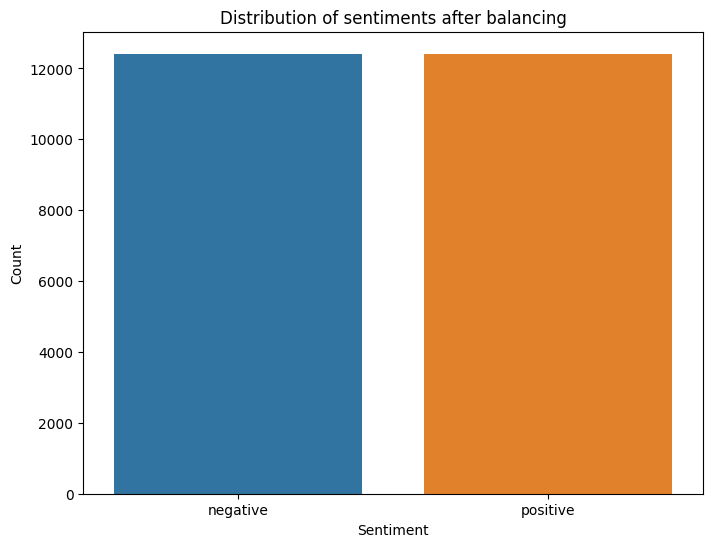

In [ ]:
# Fig. 3: Distribution of sentiments
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=undersampled_df)
plt.title("Distribution of sentiments after balancing")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [ ]:
# Split into train and test sets
#X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under_list, y_under, test_size=0.2, random_state=42)
# Split into train and test sets for the undersampled data
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under_list, y_under, test_size=0.2, random_state=42)


In [ ]:
undersampled_df

,clean_text,sentiment
0,please pay attention better review poor qualit...,negative
1,great concept great instruction cd ukulele loo...,negative
2,return item tuned sat overnight neck tore away...,negative
3,im leaving original review however adjusted ra...,negative
4,ordinary suction strong adjust angle height ov...,negative
...,...,...
24825,looking good warm attack sound new batter head...,positive
24826,absolutely love little vox classic rock amplug...,positive
24827,superb product expected winder work well howev...,positive
24828,bought granddaughter 6 year old want wanted le...,positive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from tensorflow.keras.layers import Embedding, LSTM, Dense, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import torch

# BOW - UnderSampled dataset

In [ ]:
# Feature Extraction (Bag-of-Words)
# Bag-of-Words using CountVectorizer
count_vectorizer = CountVectorizer(min_df=1,ngram_range=(1, 1))
X_under_count_train = count_vectorizer.fit_transform(X_train_under)
X_under_count_test = count_vectorizer.transform(X_test_under)


In [ ]:
# Model Training and Evaluation
models_bow_under = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Naive Bayes", MultinomialNB())
]

In [ ]:
X_under_count_test

<4966x25173 sparse matrix of type '<class 'numpy.int64'>'
	with 115798 stored elements in Compressed Sparse Row format>

In [ ]:
X_under_count_train

<19864x25173 sparse matrix of type '<class 'numpy.int64'>'
	with 464956 stored elements in Compressed Sparse Row format>

## Modelling with BOW

Model: LogisticRegression(max_iter=1000)
Accuracy: 0.8679017317760773
Precision: 0.8584603047313553
Recall: 0.8760229132569558
F1 Score: 0.8671526933981369


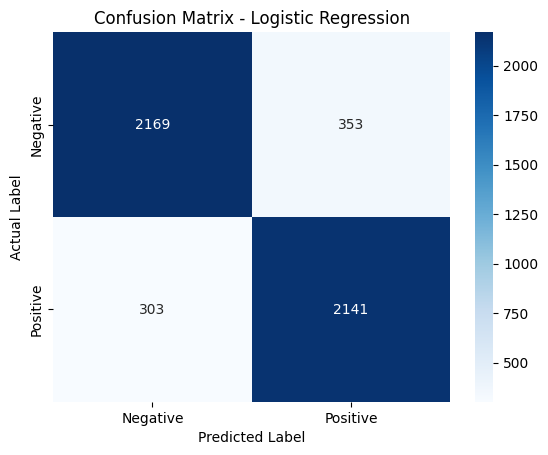

Model: MultinomialNB()
Accuracy: 0.8511880789367701
Precision: 0.8425070309361189
Recall: 0.8580196399345336
F1 Score: 0.850192580579769


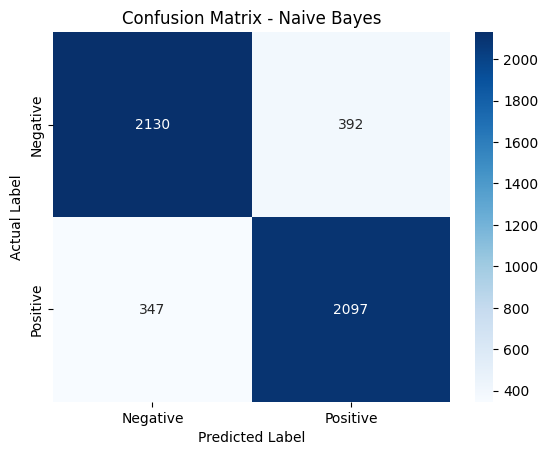

In [ ]:
# Assuming models_bow_under is a list of tuples containing (model_name, model)

for model_name, model in models_bow_under:
    # Train the model
    model.fit(X_under_count_train, y_train_under)

    # Evaluate the model
    y_pred_under = model.predict(X_under_count_test)
    accuracy = accuracy_score(y_test_under, y_pred_under)
    precision = precision_score(y_test_under, y_pred_under, pos_label='positive')
    recall = recall_score(y_test_under, y_pred_under, pos_label='positive')
    f1 = f1_score(y_test_under, y_pred_under, pos_label='positive')
    cm = confusion_matrix(y_test_under, y_pred_under)

    # Print evaluation metrics
    print(f"Model: {model}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    labels = ['Negative', 'Positive'] # Assuming 0 is negative and 1 is positive
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=labels, yticklabels=labels)  # Add labels to the x and y axes
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.show()

# TF-IFD UnderSampled dataset

In [ ]:
# Create the Transform
vectorizer = TfidfVectorizer(min_df=1,ngram_range=(1, 1))

# Tokenize and build vocab
vectorizer.fit(X_train_under)

# Summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)

# Encode document
tf_x_train_under = vectorizer.transform(X_train_under)
tf_x_test_under = vectorizer.transform(X_test_under)


{'mounting': 14376, 'sound': 20420, 'hole': 10871, 'acoustic': 1771, 'plugging': 16597, 'amp': 2264, 'supposed': 21507, 'top': 22585, 'seller': 19359, 'produce': 17104, 'single': 19899, 'decibel': 6332, 'amplification': 2284, 'sent': 19417, 'back': 2975, 'refund': 18013, 'one': 15392, 'mandolin': 13454, 'ukulele': 23193, 'work': 24792, 'perfectly': 16186, 'instrument': 11673, 'ive': 11976, 'playing': 16540, 'string': 21188, 'month': 14294, 'prefer': 16903, 'beginner': 3317, 'steel': 20946, 'dont': 7139, 'tinny': 22428, 'nuisance': 15133, 'mellow': 13736, 'le': 12662, 'shrill': 19748, 'took': 22566, 'several': 19509, 'day': 6210, 'settle': 19492, 'stay': 20927, 'tune': 22986, 'long': 13059, 'period': 16209, 'overall': 15686, 'pretty': 16979, 'good': 9882, 'glad': 9783, 'found': 9262, 'decent': 6326, 'synthetic': 21694, '50': 1110, 'ordered': 15535, 'drum': 7353, 'throne': 22282, 'based': 3160, 'review': 18507, 'read': 17717, 'described': 6536, 'either': 7703, 'mapex': 13503, 'changed': 

## Modelling with TF-IDF

In [ ]:
# Model Training and Evaluation
models_tf_idf_under = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Naive Bayes", MultinomialNB()),
   ("Support Vector machine", SVC(C=0.1, kernel= 'linear', gamma='scale'))
]

Model: LogisticRegression(max_iter=1000)
Confusion Matrix: 
[[2130  392]
 [ 347 2097]]
Accuracy: 0.8511880789367701
Model: LogisticRegression(max_iter=1000)
Accuracy: 0.8719291180024165
Precision: 0.8856655290102389
Recall: 0.8494271685761048
F1 Score: 0.8671679197994988


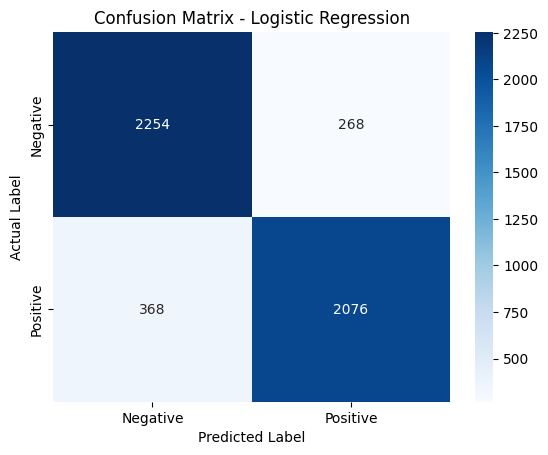

Model: MultinomialNB()
Confusion Matrix: 
[[2130  392]
 [ 347 2097]]
Accuracy: 0.8511880789367701
Model: MultinomialNB()
Accuracy: 0.8521949254933548
Precision: 0.8872282608695652
Recall: 0.8015548281505729
F1 Score: 0.8422184006878761


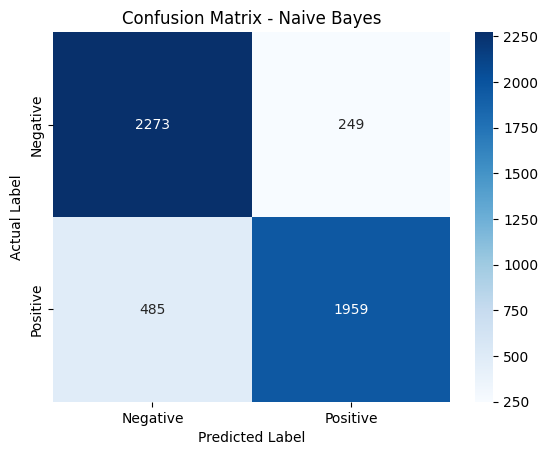

Model: SVC(C=0.1, kernel='linear')
Confusion Matrix: 
[[2130  392]
 [ 347 2097]]
Accuracy: 0.8511880789367701
Model: SVC(C=0.1, kernel='linear')
Accuracy: 0.8572291582762787
Precision: 0.8912945421741092
Recall: 0.8085106382978723
F1 Score: 0.8478867195880714


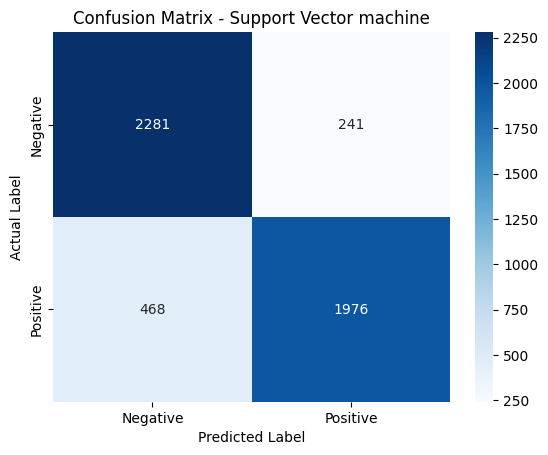

In [ ]:
for model_name, model in models_tf_idf_under:
    # Train the model
    model.fit(tf_x_train_under, y_train_under)

    # Evaluate the model
    y_pred_under_tf = model.predict(tf_x_test_under)
    accuracy = accuracy_score(y_test_under, y_pred_under)
    print(f"Model: {model}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test_under, y_pred_under)}")
    print(f"Accuracy: {accuracy_score(y_test_under, y_pred_under)}")

    # Evaluate the model
    y_pred_under_tf = model.predict(tf_x_test_under)
    accuracy = accuracy_score(y_test_under, y_pred_under_tf)
    precision = precision_score(y_test_under, y_pred_under_tf, pos_label='positive')
    recall = recall_score(y_test_under, y_pred_under_tf, pos_label='positive')
    f1 = f1_score(y_test_under, y_pred_under_tf, pos_label='positive')
    cm = confusion_matrix(y_test_under, y_pred_under_tf)

    labels = ['Negative', 'Positive'] # Assuming 0 is negative and 1 is positive
    # Print evaluation metrics
    print(f"Model: {model}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=labels, yticklabels=labels)  # Add labels to the x and y axes
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.show()